# ACTPol Foreground model


In [1]:
from ACTPol_foreground import ACTPol_Fgspectra,ReadYaml
import matplotlib.pyplot as pl
import numpy as np

This code reads the input from a `yaml` file. You can change the various parameter values directly from there.

In [2]:
FG = ACTPol_Fgspectra('ACTPol_Fg.yaml')
FG_model_Fort = FG._get_spectra_Froutine()

The Fortran routine gives you the Foreground model computed using the python trascription of the model presented in [Choi et al 2020](https://arxiv.org/abs/2007.07289) and developed [here](https://lambda.gsfc.nasa.gov/product/act/act_dr4_likelihood_multi_info.cfm). Precisely, it contains

In [5]:
FG_model_Fort

{('tt',
  'all',
  '98x98'): array([ 42.34424935,  33.2066805 ,  27.94991717, ..., 795.33335001,
        795.53004951, 795.72678455]),
 ('tt',
  'kSZ',
  '98x98'): array([1.05951143e-05, 6.64041374e-04, 1.31749187e-03, ...,
        1.83063445e+00, 1.83061326e+00, 1.83060266e+00]),
 ('tt',
  'cibp',
  '98x98'): array([2.86857109e-07, 5.73714218e-07, 9.56190363e-07, ...,
        3.00157009e+00, 3.00232778e+00, 3.00308556e+00]),
 ('tt',
  'radio',
  '98x98'): array([7.45381959e-05, 1.49076392e-04, 2.48460653e-04, ...,
        7.79940997e+02, 7.80137877e+02, 7.80334782e+02]),
 ('tt',
  'tSZ',
  '98x98'): array([2.41292264e-05, 5.83606360e-03, 1.16479738e-02, ...,
        1.04918220e+01, 1.04909292e+01, 1.04900364e+01]),
 ('tt',
  'cibc',
  '98x98'): array([1.09390103e-06, 3.01651497e-06, 6.39766362e-06, ...,
        4.48126883e-01, 4.48172131e-01, 4.48217377e-01]),
 ('tt',
  'tSZxcib',
  '98x98'): array([-6.40002178e-06, -1.28000436e-05, -2.13334049e-05, ...,
        -6.73617939e-01, -6.73

Let's compute the same foreground model using [fgspectra](https://github.com/simonsobs/fgspectra)

In [6]:
FG_model_fgspectra = FG._get_spectra_fgspectra()
FG_model_fgspectra

{('tt',
  'all',
  98,
  98): array([ 42.34425575,  33.2066933 ,  27.9499385 , ..., 796.00696795,
        796.20371489, 796.40049736]),
 ('tt',
  'kSZ',
  98,
  98): array([1.05951143e-05, 6.64041374e-04, 1.31749187e-03, ...,
        1.83063445e+00, 1.83061326e+00, 1.83060266e+00]),
 ('tt',
  'cibp',
  98,
  98): array([2.86857109e-07, 5.73714218e-07, 9.56190363e-07, ...,
        3.00157009e+00, 3.00232778e+00, 3.00308556e+00]),
 ('tt',
  'radio',
  98,
  98): array([7.45381959e-05, 1.49076392e-04, 2.48460653e-04, ...,
        7.79940997e+02, 7.80137877e+02, 7.80334782e+02]),
 ('tt',
  'tSZ',
  98,
  98): array([2.41292264e-05, 5.83606360e-03, 1.16479738e-02, ...,
        1.04918220e+01, 1.04909292e+01, 1.04900364e+01]),
 ('tt',
  'cibc',
  98,
  98): array([1.09390103e-06, 3.01651497e-06, 6.39766362e-06, ...,
        4.48126883e-01, 4.48172131e-01, 4.48217377e-01]),
 ('tt',
  'tSZxcib',
  98,
  98): array([-6.40002178e-06, -1.28000436e-05, -2.13334049e-05, ...,
        -6.73617939e-01

Now we can plot the results

In [7]:
data = ReadYaml('ACTPol_Fg.yaml')

ell = np.arange(2,data.spectra["lmax_win"]+1)

spectra = data.spectra["use_spectra"]
components = data.foregrounds["components"]
freqs = data.foregrounds["frequencies"]["nominal"]

cross = data.spectra["cross_spectra"]

combinations = {"tt": [[98,98],[98,150],[150,150]],
    "ee": [[98,98],[98,150],[150,150]],
    "te": [[98,98],[98,150],[150,98],[150,150]]}

colors = {"kSZ":"red","cibp":"blue","radio":"green","tSZ":"yellow",
            "cibc":"cyan","tSZxcib":"black","dust":"orange"}
 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


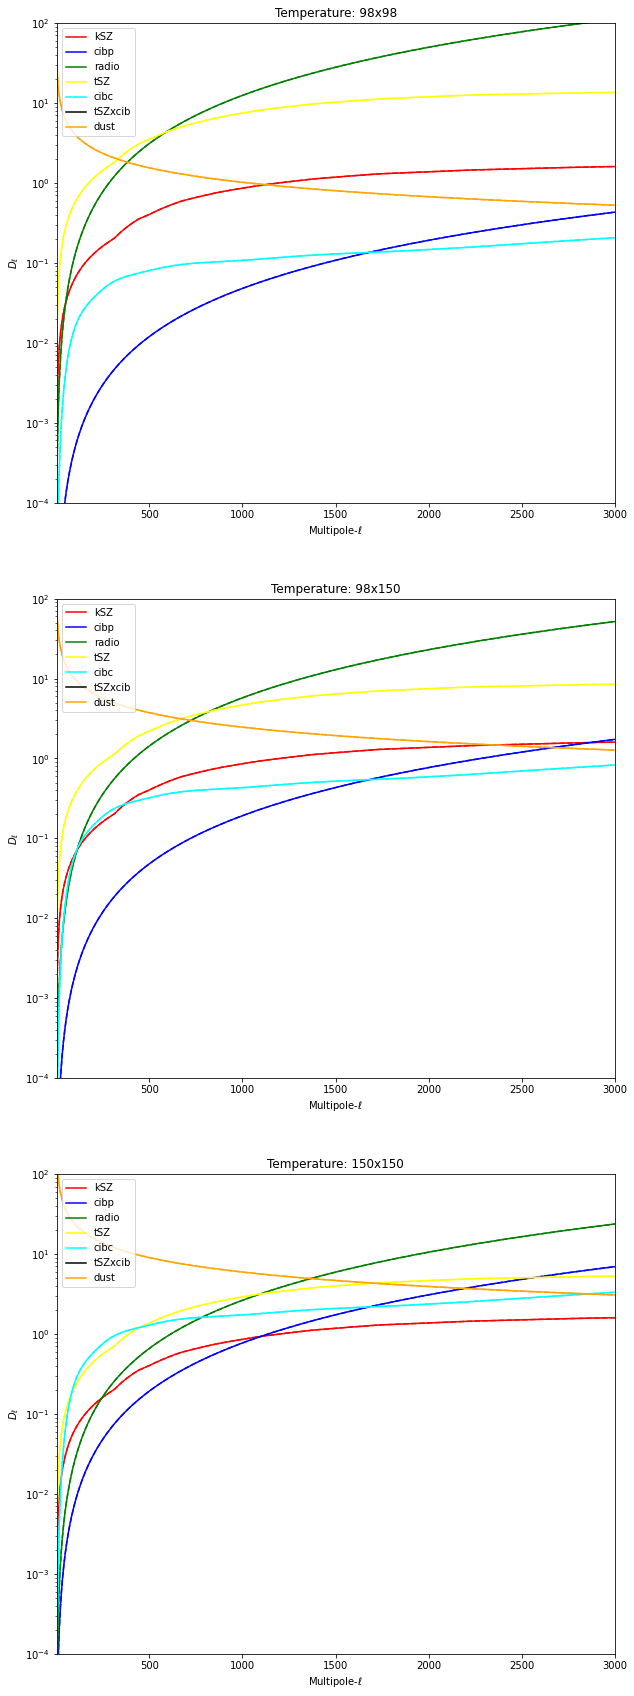

In [15]:
if "tt" in cross:
    s = "tt"
    title = 'Temperature: '
    nspec = len(cross[s])
    fig, ax = pl.subplots(figsize=(10,30),sharey=True,ncols=1,nrows=nspec)
    for j,f in enumerate(cross[s]):
        for comp in components[s]:
            f1 = combinations[s][j][0]
            f2 = combinations[s][j][1]
            ax[j].plot(ell,FG_model_Fort[s,comp,f],label=comp,color=colors[comp])
            ax[j].plot(ell,FG_model_fgspectra[s,comp,f1,f2],color=colors[comp],ls='--')
        ax[j].set_title(title+f)
        ax[j].set_xlim([2,3000])
        ax[j].set_yscale('log')
        ax[j].set_ylim([1e-4,1e2])
        ax[j].legend(loc='upper left')
        ax[j].set_xlabel(r'Multipole-$\ell$')
        ax[j].set_ylabel(r'$D_\ell$')
    fig.show()

In [17]:
for j,f in enumerate(cross[s]):
    for comp in components[s]:
        f1 = combinations[s][j][0]
        f2 = combinations[s][j][1]
        perc = np.abs((FG_model_Fort[s,comp,f]-FG_model_fgspectra[s,comp,f1,f2])/FG_model_fgspectra[s,comp,f1,f2])
        print('The maximum difference between the two foreground model for '+comp+'-'+np.str(f1)+'x'+np.str(f2)+' is {}%'.format(perc.max()*100))

The maximum difference between the two foreground model for kSZ-98x98 is 0.0%
The maximum difference between the two foreground model for cibp-98x98 is 1.5007479303126552e-13%
The maximum difference between the two foreground model for radio-98x98 is 1.6145327967842094e-13%
The maximum difference between the two foreground model for tSZ-98x98 is 4.954359184120018e-14%
The maximum difference between the two foreground model for cibc-98x98 is 1.5109445906397862e-13%
The maximum difference between the two foreground model for tSZxcib-98x98 is 0.0%
The maximum difference between the two foreground model for dust-98x98 is 1.6521100445191658e-13%
The maximum difference between the two foreground model for kSZ-98x150 is 0.0%
The maximum difference between the two foreground model for cibp-98x150 is 2.1601543805241035e-13%
The maximum difference between the two foreground model for radio-98x150 is 1.1313611088298125e-13%
The maximum difference between the two foreground model for tSZ-98x150 is

As you can see the two code returns the same foreground spectra!

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


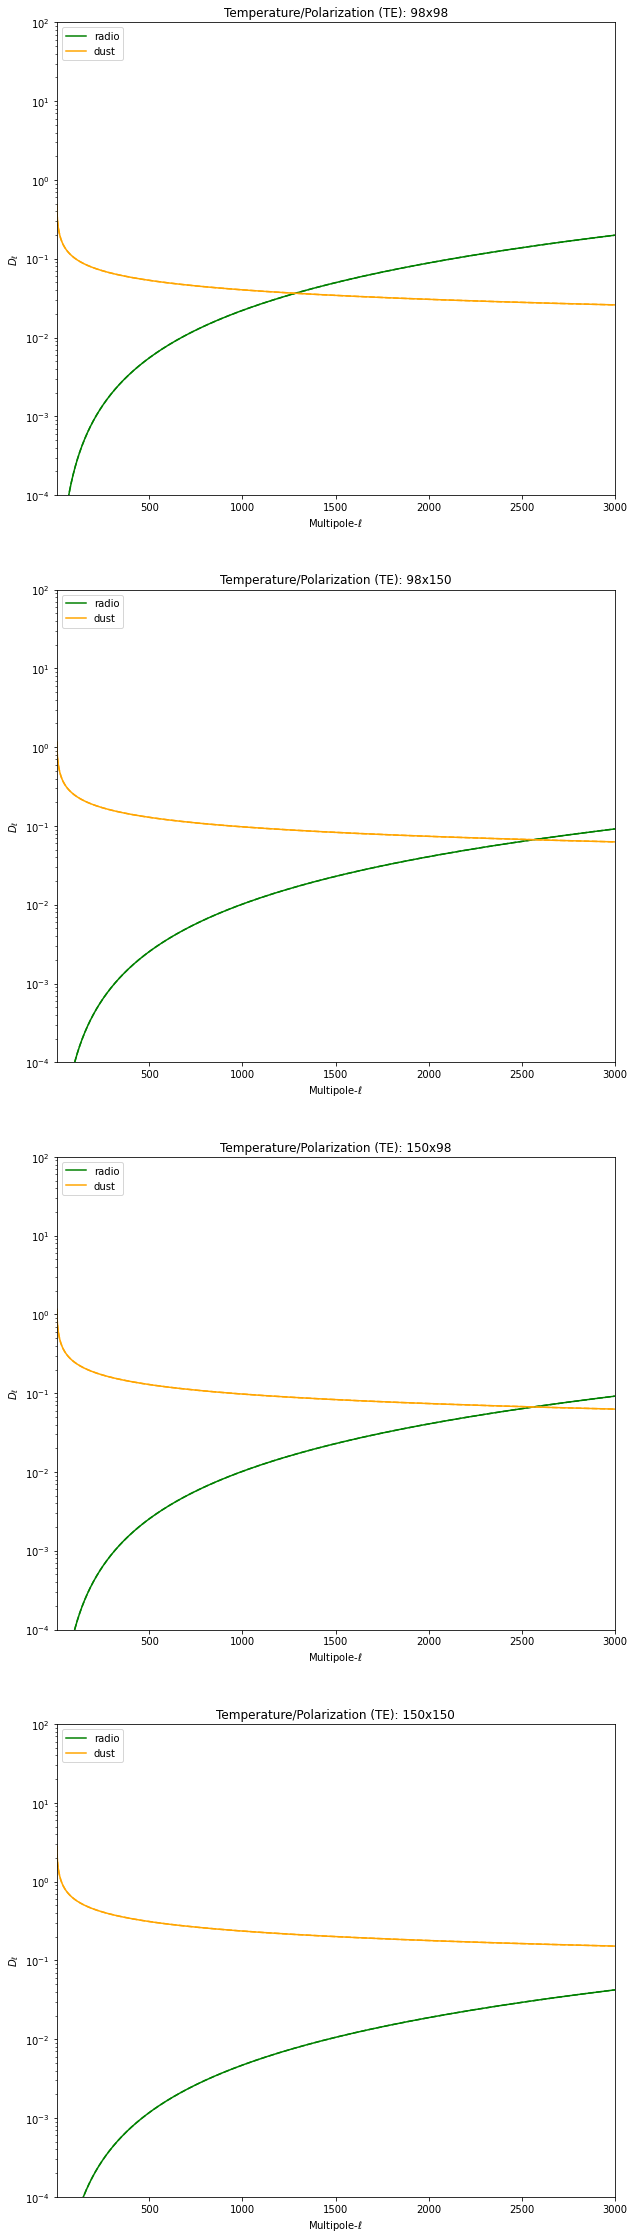

In [18]:
if "te" in cross:
    s = "te"
    title = 'Temperature/Polarization (TE): '
    nspec = len(cross[s])
    fig, ax = pl.subplots(figsize=(10,40),sharey=True,ncols=1,nrows=nspec)
    for j,f in enumerate(cross[s]):
        for comp in components[s]:
            f1 = combinations[s][j][0]
            f2 = combinations[s][j][1]
            ax[j].plot(ell,FG_model_Fort[s,comp,f],color=colors[comp],label=comp)
            ax[j].plot(ell,FG_model_fgspectra[s,comp,f1,f2],color=colors[comp],ls='--') 
        ax[j].set_title(title+f)
        ax[j].set_xlim([2,3000])
        ax[j].set_yscale('log')
        ax[j].set_ylim([1e-4,1e2])
        ax[j].set_xlabel(r'Multipole-$\ell$')
        ax[j].set_ylabel(r'$D_\ell$')
        ax[j].legend(loc='upper left')
    fig.show()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


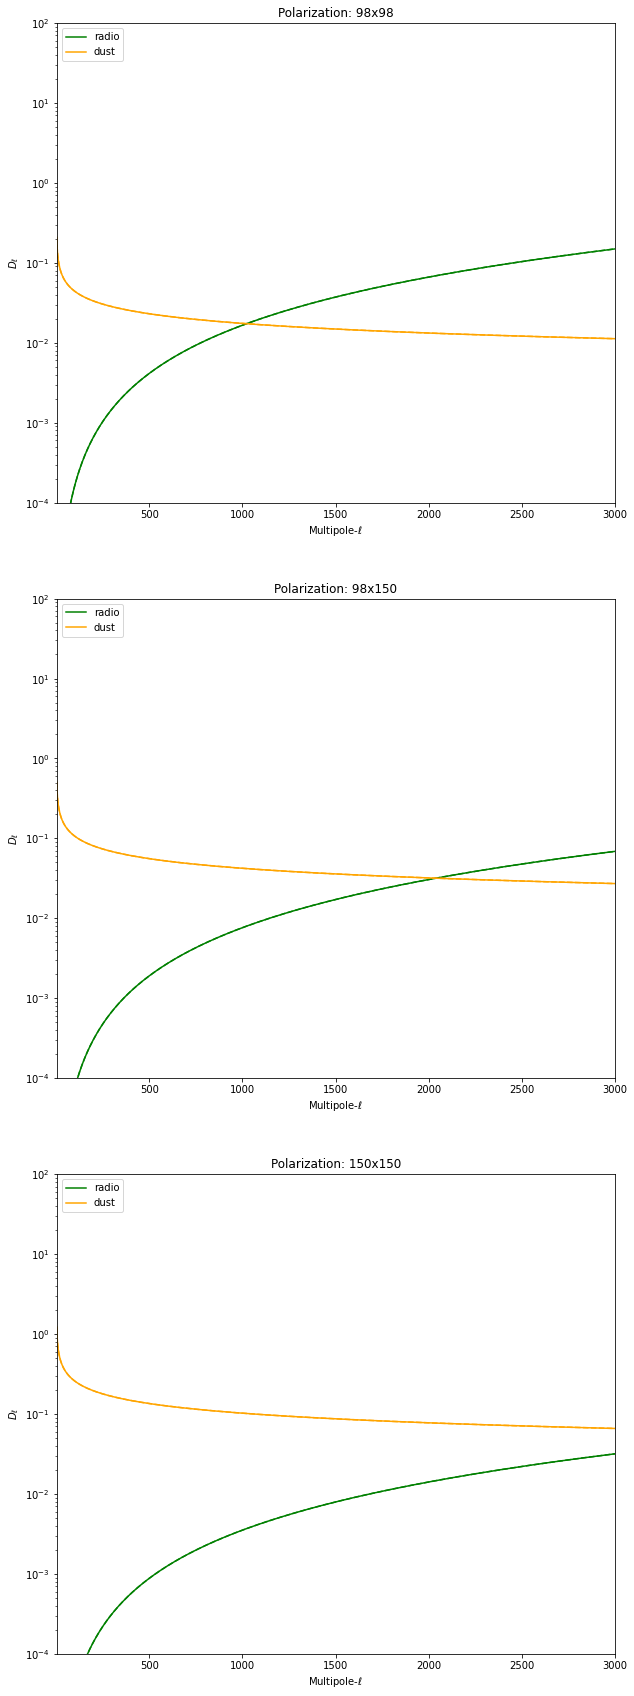

In [19]:
if "ee" in cross:
    s = "ee"
    title = 'Polarization: '
    nspec = len(cross[s])
    fig, ax = pl.subplots(figsize=(10,30),sharey=True,ncols=1,nrows=nspec)
    for j,f in enumerate(cross[s]):
        for comp in components[s]:
            f1 = combinations[s][j][0]
            f2 = combinations[s][j][1]
            ax[j].plot(ell,FG_model_Fort[s,comp,f],color=colors[comp],label=comp)
            ax[j].plot(ell,FG_model_fgspectra[s,comp,f1,f2],color=colors[comp],ls='--')
        ax[j].set_title(title+f)
        ax[j].set_xlim([2,3000])
        ax[j].set_yscale('log')
        ax[j].set_ylim([1e-4,1e2])
        ax[j].legend(loc='upper left')
        ax[j].set_xlabel(r'Multipole-$\ell$')
        ax[j].set_ylabel(r'$D_\ell$')
    fig.show()